In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score, precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc, average_precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("data"))


['creditcard.csv', 'data_link']


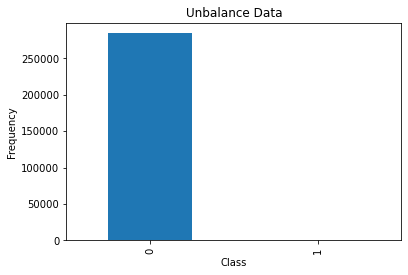

In [2]:
data = pd.read_csv("data/creditcard.csv")

#Show the unbalace of the data 
count = pd.value_counts(data['Class'], sort = True).sort_index()
count.plot(kind = 'bar')
plt.title('Unbalance Data')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [3]:
count

0    284315
1       492
Name: Class, dtype: int64

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
No_of_frauds= len(data[data["Class"]==1])
No_of_normals = len(data[data["Class"]==0])
total= No_of_frauds + No_of_normals
Fraud_percent= (No_of_frauds / total)*100
Normal_percent= (No_of_normals / total)*100

print("The number of normal transactions(Class 0) are: ", No_of_normals)
print("The number of fraudulent transactions(Class 1) are: ", No_of_frauds)
print("Class 0 percentage = ", Normal_percent)
print("Class 1 percentage = ", Fraud_percent)

The number of normal transactions(Class 0) are:  284315
The number of fraudulent transactions(Class 1) are:  492
Class 0 percentage =  99.82725143693798
Class 1 percentage =  0.1727485630620034


In [6]:
#Resampleing the dataset
data['normAmount']=StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
X=data.drop(['Time','Amount','Class'],axis=1)
y=data['Class']

print(X.shape)
print(y.shape)

(284807, 29)
(284807,)


In [7]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 12)

# show the dimensions of the train/test data
print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_test.shape: ", y_test.shape)

X_train.shape:  (213605, 29)
X_test.shape:  (71202, 29)
y_train.shape:  (213605,)
y_test.shape:  (71202,)


In [9]:
classifier= SVC(class_weight='balanced')

#Fit into Model
classifier.fit(X_train, y_train)

SVC(class_weight='balanced')

In [10]:
 #Predict the class using X_test
y_pred = classifier.predict(X_test)

In [19]:
print(confusion_matrix(y_test, y_pred))

[[70831   247]
 [   33    91]]


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71078
           1       0.27      0.73      0.39       124

    accuracy                           1.00     71202
   macro avg       0.63      0.87      0.70     71202
weighted avg       1.00      1.00      1.00     71202



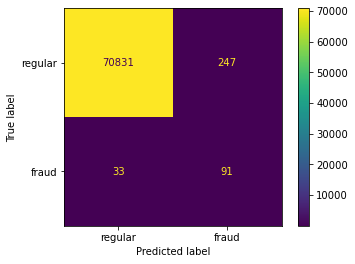

In [22]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['regular','fraud'])
cmd.plot()